# Exploration of NYC green taxi trip records

The report analyzed trips of green taxi of NYC and mainly includes three parts.
1. Overall trend of trips.
2. Analysis on which features contribute to higher tip amount.
3. Anomaly detection of the data.

In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

### Data set: New York City Green Taxi and Limousine Commission trip records
### Data time range: December 2016

### Load data

In [2]:
df = pd.read_csv('./green_tripdata_2016-12.csv.gz',index_col=False,compression='gzip',parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1,1
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,0.5,0.5,1.70,0.0,NaN,0.3,8.50,1,1
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,1,1
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,0.5,0.5,2.16,0.0,NaN,0.3,12.96,1,1


## 1. Characterize the data and comment about its quality

The data includes trip records of the whole month with payment related features and location, date and time of the trip.

All of columns are non-null except for 'ehail_fee'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224158 entries, 0 to 1224157
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1224158 non-null  int64         
 1   lpep_pickup_datetime   1224158 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  1224158 non-null  datetime64[ns]
 3   store_and_fwd_flag     1224158 non-null  object        
 4   RatecodeID             1224158 non-null  int64         
 5   PULocationID           1224158 non-null  int64         
 6   DOLocationID           1224158 non-null  int64         
 7   passenger_count        1224158 non-null  int64         
 8   trip_distance          1224158 non-null  float64       
 9   fare_amount            1224158 non-null  float64       
 10  extra                  1224158 non-null  float64       
 11  mta_tax                1224158 non-null  float64       
 12  tip_amount             12241

In [4]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,0.0,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06
mean,1.799278e+00,1.085079e+00,1.131729e+02,1.290862e+02,1.362447e+00,2.618179e+00,1.159368e+01,3.629562e-01,4.872578e-01,1.128787e+00,9.456725e-02,NaN,2.925184e-01,1.399902e+01,1.534862e+00,1.019722e+00
std,4.005404e-01,5.660195e-01,7.628387e+01,7.723367e+01,1.036924e+00,2.806160e+00,9.793499e+00,3.901575e-01,8.517500e-02,2.216306e+00,8.808537e-01,NaN,5.072935e-02,1.112872e+01,5.240995e-01,1.390438e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-1.056000e+01,-8.540000e+00,NaN,-3.000000e-01,-4.990000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,9.800000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.300000e+01,1.290000e+02,1.000000e+00,1.700000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.080000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.730000e+02,1.930000e+02,1.000000e+00,3.200000e+00,1.400000e+01,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,NaN,3.000000e-01,1.656000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,1.475000e+02,1.007000e+03,4.500000e+00,5.000000e-01,2.507000e+02,2.979800e+02,NaN,3.000000e-01,1.008300e+03,5.000000e+00,2.000000e+00


In [5]:
## drop ehail_fee which is all NULL
df = df.drop('ehail_fee',axis=1)

## 2. Explore and visualize the data.

In [6]:
def set_figure(ax,title1,title2,label = None):
    ax[0].set_title(title1)
    ax[1].set_title(title2)
    if label is not None:
        ax[0].set_xlabel(label)
        ax[1].set_xlabel(label)
    ax[0].set_ylabel('percentage')
    ax[1].get_yaxis().set_visible(False)    
    return 

#### Distribution of trip distance before and after capping data

Trip distance is extremely right skewed

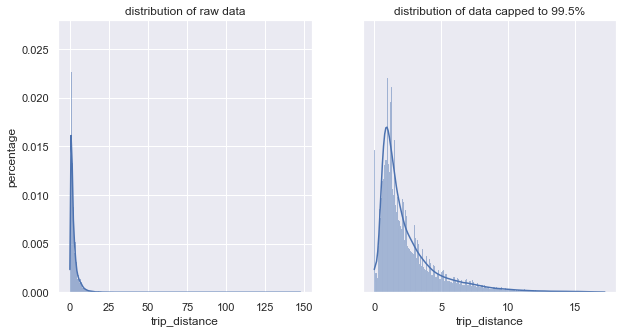

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(ax = ax[0],x = df.trip_distance,kde=True,stat='probability' )
trip_distance_cap = df.trip_distance.quantile([0.995]).values[0]
sns.histplot(ax = ax[1],x = df[df.trip_distance<=trip_distance_cap].trip_distance,kde=True,stat='probability' )
set_figure(ax,title1='distribution of raw data',title2='distribution of data capped to 99.5%')
plt.subplots_adjust(wspace=0.2)
plt.show()

### Distribution of trip total charge amount before and after floor&capping data

~67% trips cost \\$5 ~ \\$15. However, ~0.2% total amount value are negtive which may be an input error or a trip with dispute. Total amount is also positively skewed.

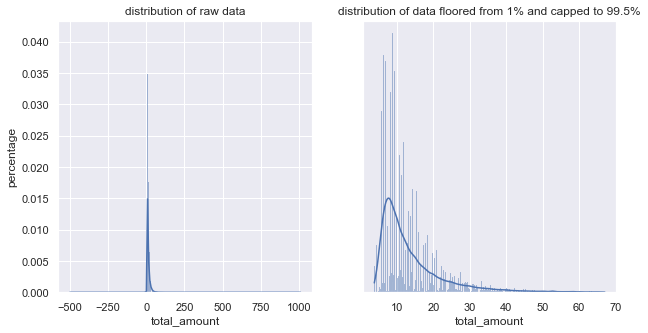

In [8]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(ax = ax[0],x = df.total_amount,kde=True,stat='probability' )
trip_amount_cap = df.total_amount.quantile([0.01,0.995]).values
sns.histplot(ax = ax[1],x = df[(df.total_amount<=trip_amount_cap[1])&(df.total_amount>=trip_amount_cap[0])].total_amount,kde=True,stat='probability' )
set_figure(ax,title1='distribution of raw data',title2='distribution of data floored from 1% and capped to 99.5%')
plt.subplots_adjust(wspace=0.2)
plt.show()

### Derive duration of trip from pickup time and drop off time

Distribution of duration got heavy tail, nearly 63% trips take 5~20mins. For the extreme long trips, it is more likely that data is incorrectly recorded, will dig into the records in anomaly detection part. 

In [9]:
df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime'])
df['duration'] = df['duration'].apply(datetime.timedelta.total_seconds).apply(lambda x:x/60)

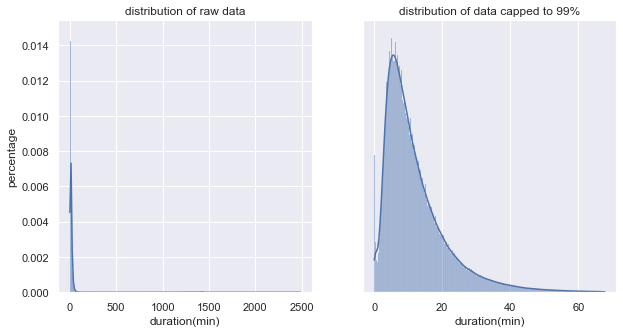

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(ax = ax[0],x = df.duration,kde=True,stat='probability' )
trip_duration_cap = df.duration.quantile([0.99]).values[0]
sns.histplot(ax = ax[1],x = df[df.duration<=trip_duration_cap].duration,kde=True,stat='probability' )
set_figure(ax,title1='distribution of raw data',title2='distribution of data capped to 99%',label = 'duration(min)')
plt.subplots_adjust(wspace=0.2)
plt.show()

### Distribution of passenger count

over 80% of trips are for single passengers. For number of passengers in [0,7,8,9], we need a deeper exploration to check if data is correct

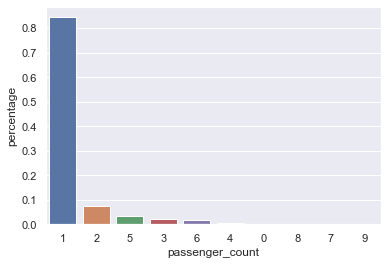

In [11]:
df_passenger = df.groupby('passenger_count')['VendorID'].count().reset_index(name='trip count').sort_values('trip count',ascending=False)
df_passenger['percentage'] = df_passenger['trip count']/df_passenger['trip count'].sum()
sns.barplot(x = 'passenger_count',y='percentage',order=df_passenger.passenger_count.unique(),data = df_passenger)
plt.show()

### Distribution of payment type

Trips paid by credit card and cash are similarly ditributed. Most of trips are in range of \\$0~\\$200 

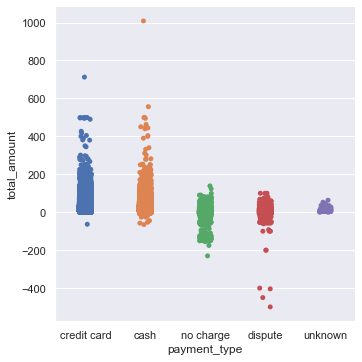

In [12]:
ax = sns.catplot(x = 'payment_type',y='total_amount',data = df)
payment_type = ['credit card','cash','no charge','dispute','unknown']
ax.set_xticklabels(payment_type)
plt.show()

## 3. Find interesting trip statistics grouped by hour

In [13]:
df['hour'] = df.lpep_pickup_datetime.dt.hour

compute median of extra fee, trip_distance, duration, and # of trips by hour. Choose median over mean to reduce impact of outliers.

In [14]:
df_hour = df.groupby(['hour']).agg({'duration':'median','trip_distance':'median','VendorID':'count','extra':'median'}).reset_index()
df_hour = df_hour.rename(columns={'VendorID':'trip_count'})
col = df_hour.columns[1:].values

1. Trip distance is relatively long in rush hour and over night.
2. In daytime the average trip duration is longer than in night
3. In rush hour, # of trips is more than other time period.
4. From the distribution of extra fee, we can infer time interval. Overnight hour is 20:00 ~ 5:00, rush hour is 16:00 ~ 19:00 and normal hour is 6:00 ~ 15:00

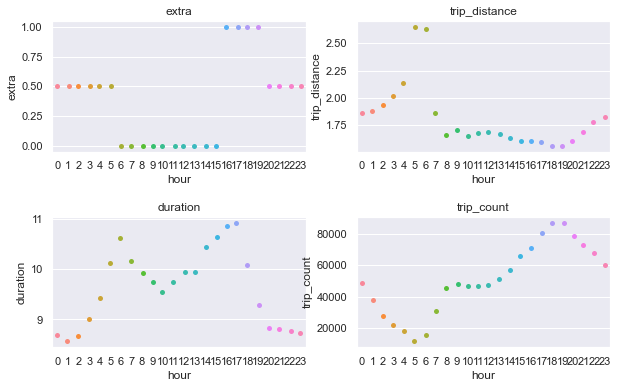

In [15]:
fig,ax = plt.subplots(2,2,figsize=(10,6))
ax = ax.flatten()
for idx,col in enumerate(['extra','trip_distance','duration','trip_count']):
    sns.stripplot(ax = ax[idx],x='hour',y=col,data = df_hour)
    ax[idx].set_title(col)
plt.subplots_adjust(hspace=0.5)  

## 4. The taxi drivers want to know what kind of trip yields better tips. Can you build a model for them and explain the model?

#### Feature Engineering

Define time period category in each day.

In [16]:
def hour_category(x):
    if x in range(16,20):
        return 'rush hour'
    if x in range(20,24) or x in range(6):
        return 'over night'
    if x in range(6,16):
        return 'normal'

In [17]:
df['hour_category'] = df['hour'].apply(lambda x: hour_category(x))

Notice that Christmas holiday is in December, create holiday_flag to distinguish if the trip date is holiday.

In [18]:
df['holiday_flag'] = df['lpep_pickup_datetime'].apply(lambda x: 1 if x.day in range(23,27) else 0)

Add weekend_flag to split weekdays and weekends

In [19]:
df['weekend_flag'] = df['lpep_pickup_datetime'].apply(lambda x: 1 if x.weekday() in range(5,7) else 0)

#### Filter out nonsense data records

In this data, tips are only populated by paid with credit card and cash tips are not included. So we only focus on data with payment type is credit card as model input.

In [20]:
# select trips paid with credit card
df_credit = df[df['payment_type']==1]
# select trips with duration>0
df_credit = df_credit[df_credit['duration']>0]
# select trips with tips>0
df_credit = df_credit[df_credit['tip_amount']>0]
# select trips with passenger count>0
df_credit = df_credit[df_credit['passenger_count']>0]

#### Capping target variable tip amount to 99.5% quantile

In [21]:
quantile_y = df_credit.tip_amount.quantile([0.995]).values
df_credit = df_credit[df_credit['tip_amount']<=quantile_y[0]]

#### Generate correlation matrix for numerical variable

From the correlation heatmap, tip amount is highly correlated with trip distance, fare amount and total_amount

In [22]:
col_num = ['tip_amount','trip_distance','fare_amount','extra','mta_tax','tolls_amount','duration','passenger_count','total_amount']

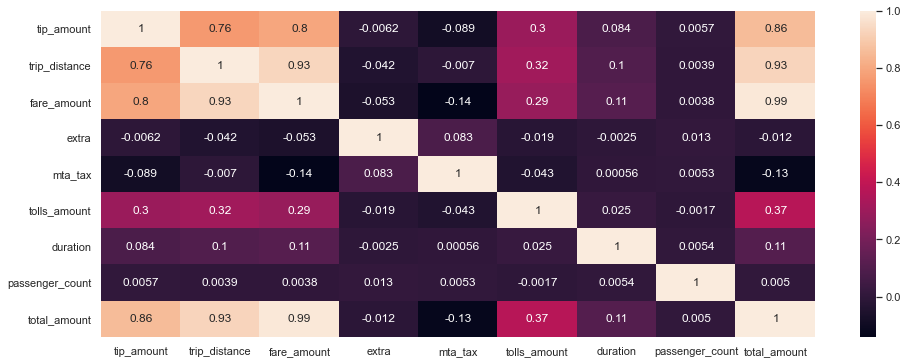

In [23]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_credit[col_num].corr(),annot=True)
plt.show()

#### Generate correlation matrix for categorical variable

In [24]:
col_cat = ['VendorID','trip_type','holiday_flag','store_and_fwd_flag','weekend_flag','RatecodeID','hour_category','passenger_count']

#### Bar plot of median of tip amount in each group

In [25]:
def plot_multiple_categorical(X, Y, features, subplots_per_row = 4,top_n=20):
    fig, ax = plt.subplots(2,4,figsize=(15,10))
    ax = ax.flatten()
    for idx,feature in enumerate(features):
        tdf= X.groupby(feature)['tip_amount'].median().reset_index(name = 'tip_amount_median')
        sns.barplot(ax = ax[idx],x = feature, y = 'tip_amount_median',data = tdf)
    plt.subplots_adjust(hspace = .2, wspace = 0.5)

Among all of the categorical variables, weekend_flag, holiday_flag and hour_category show no obvious relationship with tip amount.

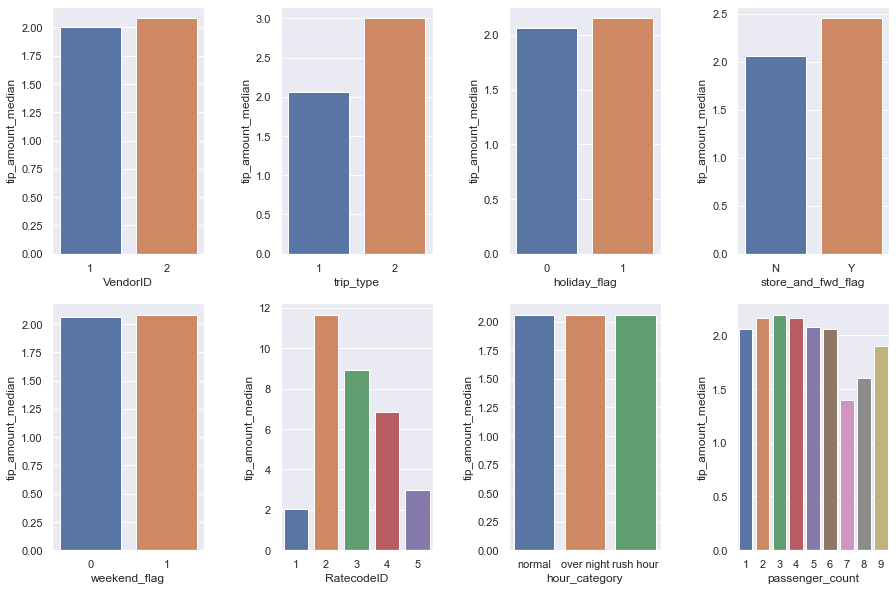

In [26]:
plot_multiple_categorical(df_credit,df_credit.tip_amount, col_cat)

#### Combine infrequent engaged location to one group

In [27]:
start_df = df_credit.groupby('PULocationID')['tip_amount'].agg({'median','count'}).reset_index().sort_values('count')
start_df['percentage'] = start_df['count']/len(df_credit)

In [28]:
high_percentage_start = start_df[start_df['percentage']>0.01]['PULocationID'].values

selected engaged locations take ~85% of trips

In [29]:
start_df[start_df['percentage']>0.01]['percentage'].sum()

0.8533336321189059

In [30]:
df_credit['PULocationID_new'] = df_credit['PULocationID'].apply(lambda x: x if x in high_percentage_start else 0)

#### It's rare that passenger number is larger than 6, combine such cases to one group

In [31]:
df_credit['passenger_count'] = df_credit['passenger_count'].apply(lambda x: 'other' if x>6 or x==0 else str(x))

### Data split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_credit_input = df_credit.drop(['lpep_pickup_datetime','lpep_dropoff_datetime','payment_type','hour','PULocationID'],axis=1)

In [34]:
def split_sets(df, seed=3):
    Y = df.tip_amount.values
    X = df.drop(columns=['tip_amount'])
    x_train_val, x_test, y_train_val, y_test = train_test_split(
        X, Y, test_size=0.15, random_state=seed)
    x_train_val = x_train_val.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.2, random_state=seed)
    return  x_train_val, x_train, x_test, x_val, y_train_val, y_train, y_test, y_val


In [35]:
x_train_val, x_train, x_test, x_val, y_train_val, y_train, y_test, y_val = split_sets(df_credit_input, seed=3)

In [36]:
x_train.shape, x_val.shape, x_test.shape

((333795, 18), (83449, 18), (73632, 18))

### Label encoding for categorical variables with multiple value

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from sklearn.metrics import r2_score

In [38]:
le = LabelEncoder()
for i in ['store_and_fwd_flag','hour_category','passenger_count']:
    le.fit(x_train[i])
    x_train[i] = le.transform(x_train[i])
    x_train_val[i] = le.transform(x_train_val[i])
    x_val[i] =  le.transform(x_val[i])
    x_test[i] = le.transform(x_test[i])

### Random Forest

This is a regression problem. Use random foreset based on regression tree over linear regression. The reason is most of features are skewed and high correlation among features, inference of coefficient would be inaccurate in this condition

Random search for best hyperparameters

In [39]:
split_index = [-1 if x in x_train.index else 0 for x in x_train_val.index]
pds = PredefinedSplit(test_fold = split_index)

In [40]:
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
max_features = [x for x in np.linspace(0.1, 1, num = 5)]
min_samples_leaf = [int(x) for x in np.linspace(6, 20, num = 5)]

In [41]:
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

### Model training

In [42]:
rf = RandomForestRegressor()

In [43]:
rf_random = RandomizedSearchCV(
    estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error',
    n_iter = 30, cv = pds, random_state=42, verbose=2, n_jobs = -1)

In [44]:
time_start = datetime.now()
rf_random.fit(x_train_val, y_train_val)
time_end = datetime.now()
print ('execution time:%s mins'%((time_end - time_start).seconds/60))

Fitting 1 folds for each of 30 candidates, totalling 30 fits
[CV] END max_depth=16, max_features=0.775, min_samples_leaf=9; total time= 5.7min
[CV] END max_depth=16, max_features=0.1, min_samples_leaf=16; total time=  42.3s
[CV] END ..max_depth=8, max_features=0.1, min_samples_leaf=9; total time=  29.0s
[CV] END max_depth=5, max_features=0.55, min_samples_leaf=13; total time= 1.6min
execution time:13.7 mins
[CV] END max_depth=5, max_features=0.775, min_samples_leaf=16; total time= 2.2min
[CV] END max_depth=8, max_features=0.775, min_samples_leaf=20; total time= 3.2min
[CV] END max_depth=20, max_features=0.55, min_samples_leaf=20; total time= 4.2min
[CV] END max_depth=12, max_features=0.325, min_samples_leaf=9; total time= 2.2min
[CV] END .max_depth=16, max_features=1.0, min_samples_leaf=9; total time= 7.4min
[CV] END max_depth=8, max_features=0.775, min_samples_leaf=13; total time= 3.4min
[CV] END max_depth=16, max_features=0.1, min_samples_leaf=13; total time=  42.7s
[CV] END .max_dep

### Model performance

In [46]:
pd.DataFrame({'r2':[r2_score(y_train,rf_random.predict(x_train)),r2_score(y_val,rf_random.predict(x_val)),r2_score(y_test,rf_random.predict(x_test))]},index=['train','val','test'])

,r2
train,0.985556
val,0.984803
test,0.981405


### Feature Importance

Tips largely depends on trip distance, drivers may get more tips they drive for longer distance.

In [48]:
importances = rf_random.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=x_train.columns)
forest_importances = forest_importances.sort_values(ascending=False)

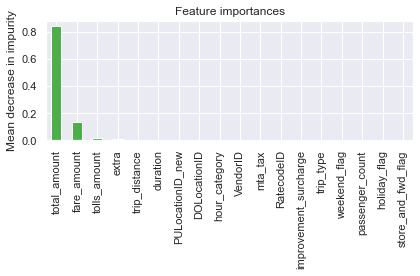

In [49]:
fig, ax = plt.subplots()
forest_importances.plot.bar(color='#4daf4a')
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Find an anomaly in the data and explain your findings.

#### Incorrect Passenger_count

Passenger_count is zero but in fact the taxi runs. This means driver wrongly input the passenger count. The percentage is ~0.003%.

By way of selecting pick up location is different from drop off location and duration of trip is longer than 1min, we can get real trips. Otherwise if the trip is cancelled, zero passenger count is correct.

In [50]:
df[(df['passenger_count']==0)&(df['PULocationID']!=df['DOLocationID'])&(df['duration']>1)].shape[0]/len(df)*100

0.0025323528498772214

Maximum capacity of passenger is 6 for yellow taxi quoted from the FAQ on official website. For green taxi, suppose the capacity is similar so that it's abnormal that passenger count is larger than 6. Percentage is ~0.07%\
<img src="passenger_count.png" width=500 height=500 />

In [51]:
df[df['passenger_count']>6].shape[0]/len(df)*100

0.006698481731933296

#### Abnormal total amount

total amount should be positively correlated with trip distance or trip duration. However cases with large total_amount and short distance or small amount and long distance are potentially anomaly cases. 

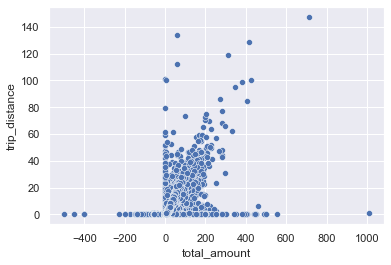

In [52]:
sns.scatterplot(df.total_amount,df.trip_distance)

### Case sample

In [53]:
df[(df['total_amount']>200)&(df['trip_distance']<20)] ## large amount and short distance 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,duration,hour,hour_category,holiday_flag,weekend_flag
11433,2,2016-12-01 11:26:05,2016-12-01 11:27:35,N,5,78,78,4,0.00,499.0,...,0.0,0.0,499.0,1,2,1.500000,11,normal,0,0
35954,2,2016-12-01 22:27:28,2016-12-01 22:27:37,N,5,166,166,1,0.00,215.0,...,0.0,0.0,215.0,1,2,0.150000,22,over night,0,0
37088,2,2016-12-01 22:15:47,2016-12-01 22:20:01,N,5,248,248,2,0.00,350.0,...,0.0,0.0,350.0,1,2,4.233333,22,over night,0,0
57375,2,2016-12-02 14:02:38,2016-12-02 14:56:39,N,1,122,122,1,0.01,26.5,...,0.0,0.3,278.0,1,1,54.016667,14,normal,0,0
59418,2,2016-12-02 15:00:08,2016-12-02 15:18:12,N,1,122,130,1,2.26,13.5,...,0.0,0.3,254.3,1,1,18.066667,15,normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107700,1,2016-12-29 00:08:21,2016-12-29 00:15:57,N,1,255,256,1,1.30,1007.0,...,0.0,0.3,1008.3,2,1,7.600000,0,over night,0,0
1132374,2,2016-12-29 20:59:33,2016-12-29 21:00:06,N,5,265,265,1,0.00,250.0,...,0.0,0.0,250.0,2,2,0.550000,20,over night,0,0
1144250,2,2016-12-30 08:27:43,2016-12-30 08:27:46,N,5,97,65,1,0.00,350.0,...,0.0,0.0,380.0,1,2,0.050000,8,normal,0,0
1146264,1,2016-12-30 09:13:06,2016-12-30 09:13:06,N,5,116,264,1,0.00,230.0,...,0.0,0.0,230.0,2,1,0.000000,9,normal,0,0


In [148]:
df[(df['total_amount']<20)&(df['trip_distance']>60)]  ## small amount and long distance 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,duration,hour,hour_category,holiday_flag,weekend_flag,predicted,diff
1010718,1,2016-12-25 12:48:25,2016-12-25 18:47:08,N,5,129,173,1,101.30,0.0,...,0.0,2,2,358.716667,12,normal,1,1,-1.205799,-1.205799
1011361,2,2016-12-25 13:44:43,2016-12-25 18:32:20,N,5,7,129,2,100.39,5.0,...,5.0,2,2,287.616667,13,normal,1,1,3.771287,-1.228713
1077103,2,2016-12-28 01:23:52,2016-12-28 03:01:41,N,4,76,265,3,61.71,0.0,...,0.0,2,1,97.816667,1,over night,0,0,-1.205799,-1.205799
1160413,2,2016-12-30 17:15:44,2016-12-30 20:45:36,N,1,265,188,2,79.54,0.0,...,0.0,2,1,209.866667,17,rush hour,0,0,-1.205799,-1.205799


## Improvement in the future

1. In anomaly detection part, the threshold is generated from scatter plot by eye. We can try to use outlier detection methods eg three sigma to get the threshold.
2. Given anomal records found, we can retrain the model after removing the abnormal data to improve model performance.

In [57]:
pd.read_csv('./green_tripdata_2016-12.csv.gz',compression='gzip',index_col=False)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1,1
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,0.5,0.5,1.70,0.0,NaN,0.3,8.50,1,1
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,1,1
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,0.5,0.5,2.16,0.0,NaN,0.3,12.96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224153,1,2016-12-31 23:00:16,2016-12-31 23:05:30,N,1,74,75,1,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1
1224154,1,2016-12-31 23:00:20,2016-12-31 23:04:05,N,1,42,41,3,1.00,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2,1
1224155,1,2016-12-31 23:00:08,2016-12-31 23:15:57,N,1,243,159,1,5.30,18.5,0.5,0.5,3.95,0.0,NaN,0.3,23.75,1,1
1224156,1,2016-12-31 23:00:00,2016-12-31 23:10:15,N,1,244,120,3,1.60,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,2,1
